# Importación de las librerias que vamos a utilizar

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import rasterio as rio
import scipy.ndimage
import skimage.feature

# Defino una ventana que permita visuaizar los graficos

In [23]:
def wind(image):  
    cv2.namedWindow("image",cv2.WINDOW_NORMAL)
    cv2.imshow('image', image)#"image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Abro las imagenes 

In [4]:
crops=cv2.imread("sembrio1.png",1)
wind(crops)

In [5]:
crops2=cv2.imread("sembrio2.png",0)
wind(crops2)

In [6]:
guaya=cv2.imread("Guayaquil.jpg",1)
rioguaya=cv2.resize(guaya,dsize=None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
wind(rioguaya)

# Colocar filtros

In [7]:
sobelx=cv2.Sobel(crops,cv2.CV_8U,1,0,ksize=3)
wind(sobelx)

# Detección de taludes

In [8]:
laplacian=cv2.Laplacian(crops,cv2.CV_8U)
wind(laplacian)

## Identificación de bordes y pendientes

In [9]:
edges1=cv2.Canny(crops,150,400)
wind(edges1)

In [10]:
edges2=cv2.Canny(crops2,150,400)
wind(edges2)

In [11]:
edges3=cv2.Canny(rioguaya,150,400)
wind(edges3)

# Guardar la imagen

In [12]:
cv2.imwrite("New1.png",edges1)

True

## Borrar imagen

In [14]:
try: 
    os.remove("New1.png")
except: pass

# Encontrar similitudes entre dos imagenes

In [13]:
imagen1= cv2.imread("sembrio1.png")
imagen2= cv2.imread("New1.png")


## Ver si las imagenes son iguales

In [14]:
if imagen1.shape == imagen2.shape:
    print("Las imagenes tienen el mismo tamaño y escala de gises ")
    differencia= cv2.subtract(imagen1,imagen2)
    b,g,r=cv2.split(differencia)
    
    if cv2.countNonZero(b) == 0 and cv2. countNonZero(g) ==0 and cv2.countNonZero(r)==0:
        print("Las imagenes son completamente iguales")
    else:
        print("La imagenes no son  iguales")

Las imagenes tienen el mismo tamaño y escala de gises 
La imagenes no son  iguales


## Ver si dos imagenes en diferente tiempo o por diferentes satelites son similares

In [25]:
sift=cv2.SIFT_create()
kp_1, desc_1 =sift.detectAndCompute(imagen1,None)
kp_2, desc_2 =sift.detectAndCompute(imagen2,None)

index_params=dict(algorithm=0, trees=5)
search_params=dict()
flann =cv2.FlannBasedMatcher(index_params,search_params)

matches=flann.knnMatch(desc_1,desc_2, k=2)
#print(len(matches))

good_points=[]
ratio=0.1
for m, n in matches:
    if m.distance< ratio*n.distance:
        good_points.append(m)
        print(len(good_points))

#result = cv2.drawMatchesKnn(imagen1,kp_1,imagen2,kp_2,matches, None)
result = cv2.drawMatches(imagen1,kp_1,imagen2,kp_2,good_points, None)
cv2.imshow("result",result)
##Cambio el tamaño 
#cv2.resize(result,None, fx=0.4, fy=0.4)
##cambio en imagen 1 e imagen2

cv2.imshow("imagen1",imagen1)
cv2.imshow("imagen2",imagen2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 0rientación con detección de lineas rectas usando "La transformada de Hough "

## Abriendo la imagen

C:\Users\JONATHAN\miniconda3\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


<IPython.core.display.Javascript object>


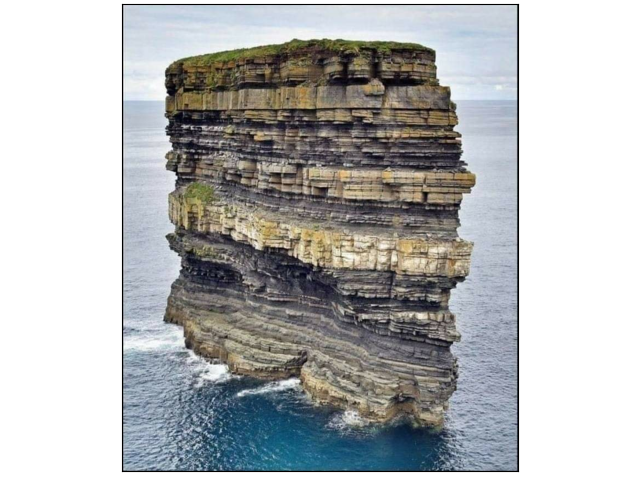

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import scipy.ndimage

from context import data
from context import utils

with rio.open(data.naip.lineaments, 'r') as src:
    aerial_photo = src.read()

# Rasterio has a "bands-on-first-axis" convention, matplotlib/etc has
# a "bands-on-last-axis" convention. Use moveaxis to switch between.
aerial_photo = np.moveaxis(aerial_photo, 0, -1)

fig, ax = plt.subplots(constrained_layout=True)
ax.imshow(aerial_photo)
ax.set(xticks=[], yticks=[])
plt.show()

<IPython.core.display.Javascript object>


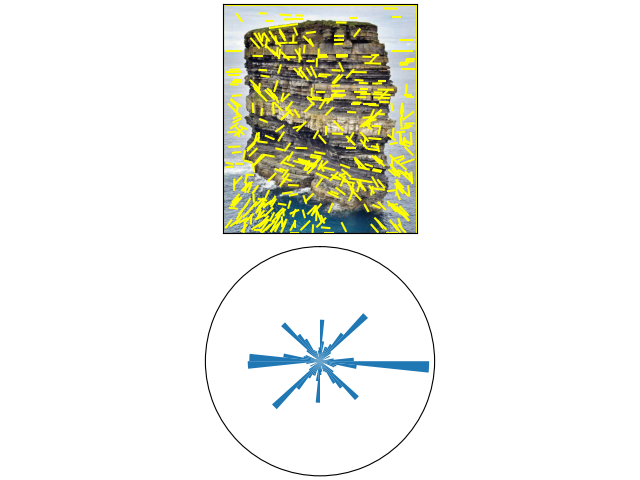

In [20]:
gray_aerial = aerial_photo.astype(float).mean(axis=-1)
canny = skimage.feature.canny(gray_aerial, sigma=3)
lines = probabilistic_hough_line(canny, line_length=30, 
                                 line_gap=5)
 
# Calculate azimuth
lines = np.array(lines)
dx, dy = np.squeeze(np.diff(lines, axis=1)).T
# Negative dy due to image orientation, 90 - angle for azimuth
angles = np.pi / 2 - np.arctan2(-dy, dx)

fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, projection='polar', theta_offset=np.pi/2,
                      theta_direction=-1)
ax1.imshow(aerial_photo)
ax1.add_collection(LineCollection(lines, color='yellow'))
ax2.hist(np.concatenate([angles, angles + np.pi]), bins=60)

ax1.set(xticks=[], yticks=[])
ax2.set(xticks=[], yticks=[], axisbelow=True)

plt.show()

In [29]:
Ori=cv2.imread("Moher.jpg",0)
edges4=cv2.Canny(Ori,150,400)
wind(edges4)

In [30]:
lines=cv2.HoughLines(Ori,5,5*np.pi/180,200)

In [31]:
lines

array([[[ 5.2750000e+02,  7.8539813e-01]],

       [[ 3.2500000e+01,  2.3561945e+00]],

       [[ 5.9750000e+02,  7.8539813e-01]],

       [[ 1.0250000e+02,  2.3561945e+00]],

       [[ 5.4750000e+02,  6.9813168e-01]],

       [[-2.5000000e+00,  2.4434609e+00]],

       [[-3.7500000e+01,  2.3561945e+00]],

       [[ 4.8750000e+02,  6.1086524e-01]],

       [[-1.0250000e+02,  2.5307274e+00]],

       [[-6.2500000e+01,  2.5307274e+00]],

       [[-8.2500000e+01,  2.5307274e+00]],

       [[ 4.5250000e+02,  7.8539813e-01]],

       [[ 7.7500000e+01,  2.3561945e+00]],

       [[ 4.7500000e+01,  2.3561945e+00]],

       [[ 5.7500000e+01,  2.3561945e+00]],

       [[ 6.6750000e+02,  7.8539813e-01]],

       [[ 4.4250000e+02,  5.2359879e-01]],

       [[-1.8750000e+02,  2.6179938e+00]],

       [[-1.7250000e+02,  2.6179938e+00]],

       [[-1.5250000e+02,  2.6179938e+00]],

       [[-1.4250000e+02,  2.6179938e+00]],

       [[ 4.2750000e+02,  5.2359879e-01]],

       [[ 4.5750000e+02,  5.2359

In [32]:
for iterator in lines:
    rho=iterator[0][0]
    theta=iterator[0][1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(Ori,(x1,y1),(x2,y2),(0,0,255),2)

In [33]:
wind(Ori)